In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Variables:

- $q$: number of (shifted) Legendre polynomials to use
- $\mathcal{P}_t$: the vector of $q$ (shifted) Legendre polynomials, evaluated at $t$
- $M$: a ($q \times q$) matrix

Definition:
- Let $C_t = \mathcal{P}_t \times \mathcal{P}_t$ (the $q \times q$ matrix formed by the outer product of $\mathcal{P}_t$ with itself)

Question:
- Is there a nice way to compute the following:
  - $\mathcal{M} = \int_0^1C_t M C_t dt $
  - $\mathcal{C} = \int_0^1C_t dt$
  
  (and yes, these seem like really weird things to want to compute, but they turn out to be useful for learning....)

There's a nice closed-form answer for the second of these, but I found it by obervation rather than by solving:

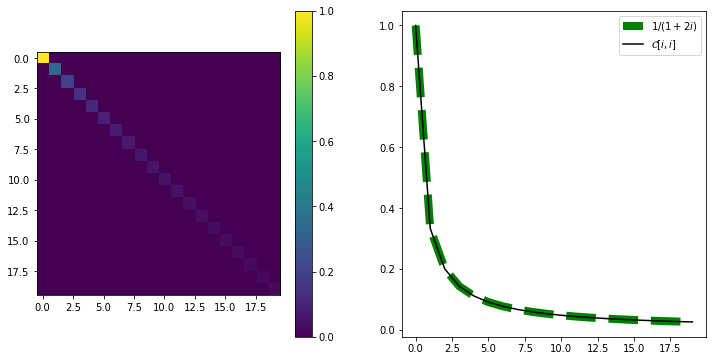

In [24]:
from scipy.special import legendre

q = 20
n_steps = 100000
t = np.linspace(0, 1, n_steps)
P = np.asarray([legendre(i)(2*t - 1) for i in range(q)]).T

total = np.zeros((q,q))
for Pt in P:
    Ct = np.outer(Pt, Pt)
    total += Ct / n_steps
    
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(total)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.plot(1.0/(1+np.arange(q)*2), c='g', lw=8, ls='--', label='$1/(1+2i)$')
plt.plot(np.diag(total), label=r'$\mathcal{C}[i,i]$', c='k')
plt.legend()
plt.show()

That seems to indicate this identity:

$\mathcal{C}[i,j] = 
     \begin{cases}
         1/(1+2i), & \text{if}\ i=j \\
         0, & \text{otherwise}
    \end{cases}
$

This is useful, but is there a way to show this?  And is there something similarly nice for $\int_0^1C_t M C_t dt $?